In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## Counts of Job Titles

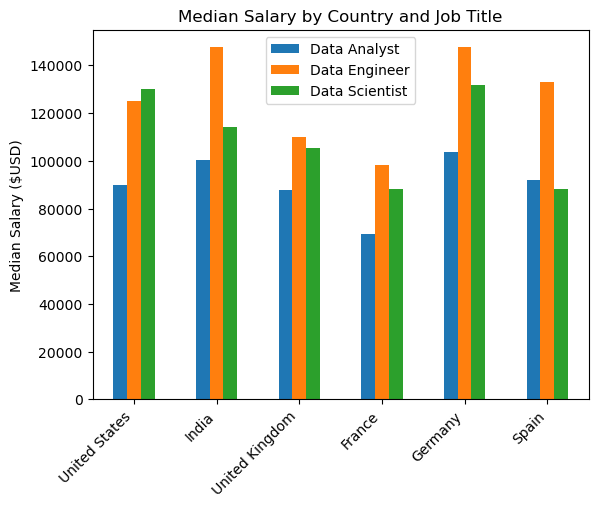

In [35]:
top_countries = df['job_country'].value_counts().head(6).index

df_job_country_salary = df.pivot_table(values='salary_year_avg', index='job_country', columns= 'job_title_short', aggfunc='median')

df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary.plot(kind='bar')
plt.ylabel('Median Salary ($USD)')
plt.xlabel('')
plt.title('Median Salary by Country and Job Title')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [24]:
pivot_table = df.pivot_table(index=['job_title_short', 'job_country'] , aggfunc='size')
pivot_table.head(10)

job_title_short   job_country
Business Analyst  Afghanistan      4
                  Albania         11
                  Algeria         21
                  Angola           1
                  Argentina      453
                  Armenia         29
                  Australia      928
                  Austria        738
                  Azerbaijan      16
                  Bahamas          5
dtype: int64

In [27]:
pivot_table2 = df.pivot_table(values='salary_year_avg', index='company_name', aggfunc=['max','min','mean'])

pivot_table2.head()

,max,min,mean
,salary_year_avg,salary_year_avg,salary_year_avg
company_name,,,
#twiceasnice Recruiting,120000.000000,61000.000000,77750.000000
/dev/color,125000.000000,125000.000000,125000.000000
0nward Select,92500.000000,92500.000000,92500.000000
1 Point System,137290.484375,137290.484375,137290.484375
1 Point System LLC.,170000.000000,170000.000000,170000.000000


In [34]:
data_scientist_df = df[df['job_title_short'] == 'Data Scientist'].copy()

pivot_table3 = data_scientist_df.pivot_table(values='salary_year_avg', index=['company_name','job_country'], aggfunc='median')

filtered_pivot_table3 = pivot_table3[pivot_table3['salary_year_avg'] > 200000]

filtered_pivot_table3.head(10)

salary_year_avg
company_name        job_country                   
ACT                 Sudan                 225000.0
                    United States         225000.0
Abbott              United States         204000.0
Airbnb              United States         212500.0
Airtable            Sudan                 215500.0
                    United States         233500.0
Algo Capital Group  Sudan                 325000.0
                    United States         350000.0
Amadeus Search      United States         232500.0
Analog Devices, Inc United States         375000.0